In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import lag_plot

In [3]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [4]:
BTC_USD_df = pd.read_csv("BTC-USD.csv")
ETH_USD_df = pd.read_csv("ETH-USD.csv")
BNB_USD_df = pd.read_csv("BNB-USD.csv")
DOGE_USD_df = pd.read_csv("DOGE-USD.csv")
ETH_BTC_df = pd.read_csv("ETH-BTC.csv")
BNB_BTC_df = pd.read_csv("BNB-BTC.csv")
DOGE_BTC_df = pd.read_csv("DOGE-BTC.csv")

In [5]:
df_list = [BTC_USD_df, ETH_USD_df, BNB_USD_df, DOGE_USD_df, ETH_BTC_df, BNB_BTC_df, DOGE_BTC_df]

First, we want to check to make sure that each of these CSV files has the correct columns, and the expected number of rows for each.

In [6]:
for data in df_list:
    data.index = pd.to_datetime(data["Date"])
    print(get_df_name(data))
    print(data.shape)
    print(data.columns)

BTC_USD_df
(2887, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
ETH_USD_df
(1738, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
BNB_USD_df
(1738, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
DOGE_USD_df
(1738, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
ETH_BTC_df
(1737, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
BNB_BTC_df
(1737, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
DOGE_BTC_df
(1737, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [7]:
for data in df_list:
    print(data.isnull().values.sum())

0
0
0
0
12
12
12


It looks like there are null values in the last three files, this could be an error in how they started collecting the data, since it is each compare the bitcoin as opposed to USD. To deal with these null values (and any null values in the future), we will simply remove them, since there is a very low number of them.

In [8]:
for data in df_list:
    data.dropna(inplace = True)
    print(data.isnull().values.sum())

0
0
0
0
0
0
0


Next we want to plot each of the coins against USD to see what the data looks like, and see if there are any values that could be outliers.

In [9]:
for data in df_list:
    print(data.head(1))

                  Date        Open        High         Low       Close  \
Date                                                                     
2014-09-17  2014-09-17  465.864014  468.174011  452.421997  457.334015   

             Adj Close    Volume  
Date                              
2014-09-17  457.334015  21056800  
                  Date        Open        High      Low       Close  \
Date                                                                  
2017-11-09  2017-11-09  308.644989  329.451996  307.056  320.884003   

             Adj Close     Volume  
Date                               
2017-11-09  320.884003  893249984  
                  Date     Open     High      Low    Close  Adj Close  \
Date                                                                    
2017-11-09  2017-11-09  2.05314  2.17423  1.89394  1.99077    1.99077   

              Volume  
Date                  
2017-11-09  19192200  
                  Date      Open      High       Low     Clos

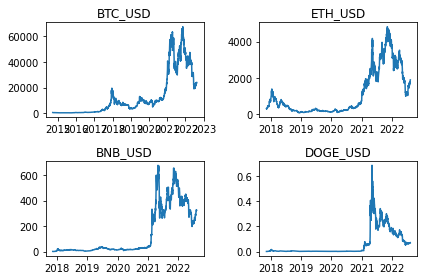

In [10]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(df_list[i].Close)
    plt.title(get_df_name(df_list[i])[:-3])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
plt.tight_layout()
plt.show()

Now let's look at the latter three plotted against bitcoin. This can be useful since it will possibly account for the fluxuation in popularity of cryptocurrency in general.

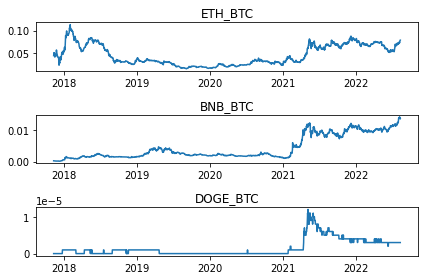

In [11]:
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(df_list[i+4].Close)
    plt.title(get_df_name(df_list[i+4])[:-3])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
plt.tight_layout()
plt.show()

This might be useful, we will look at a lag plot of both the coins against USD, and against BTC later to see how feasible a time series forecast would be. Next, let's look at the high/low and open/close of each of these.

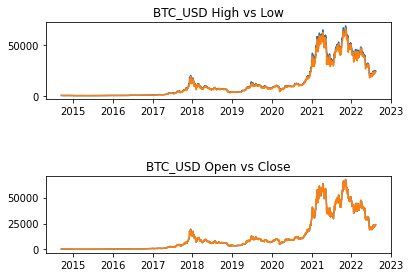

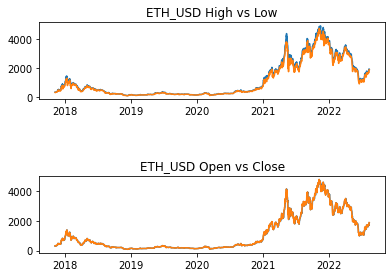

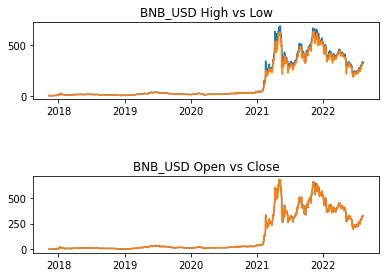

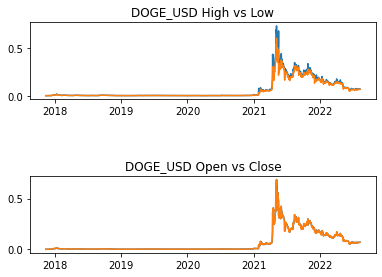

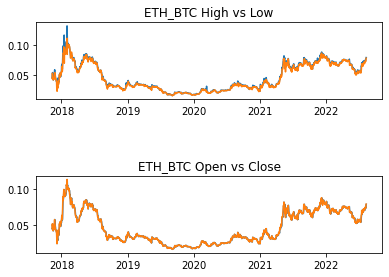

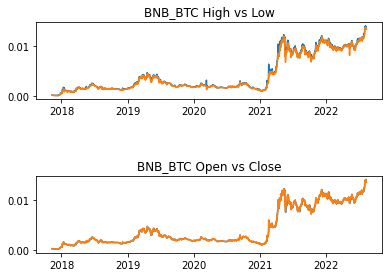

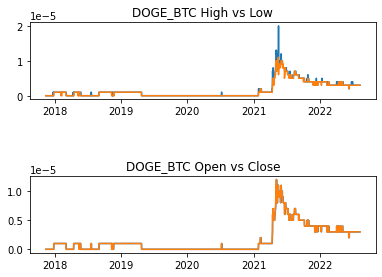

In [12]:
i = 0
while i < 7:
    hl = df_list[i][['High', 'Low']]
    plt.subplot(2,1,1)
    plt.title(get_df_name(df_list[i])[:-3] + " High vs Low")
    plt.plot(hl)
    i=i+1
    plt.subplot(2,1,2)
    plt.title(get_df_name(df_list[i-1])[:-3] + " Open vs Close")
    oc = df_list[i-1][['Open', 'Close']]
    plt.plot(oc)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
    plt.show()
    

Outside of dogecoin, it looks like the high/low and open/close are relatively close. Even in the case of dogecoin, I do not think it is necessary to change anything to account for outliers, since the open and close prices are still very close. Next we will look at lagplots for each of these, with various time lags.

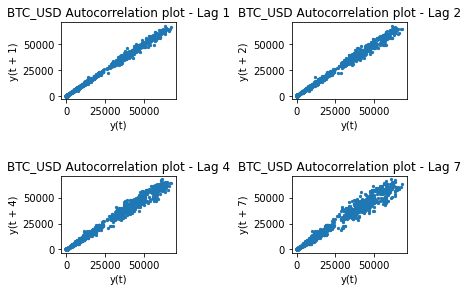

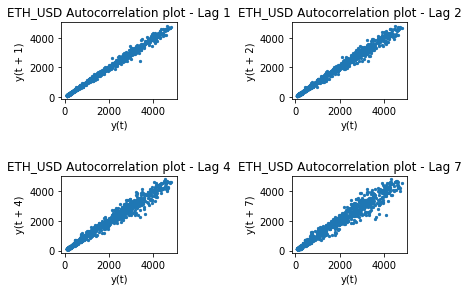

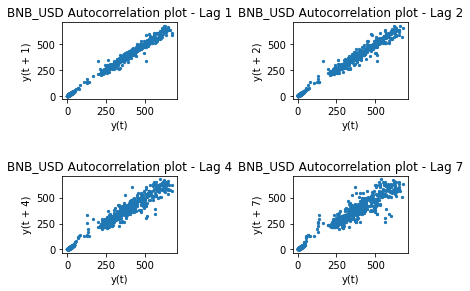

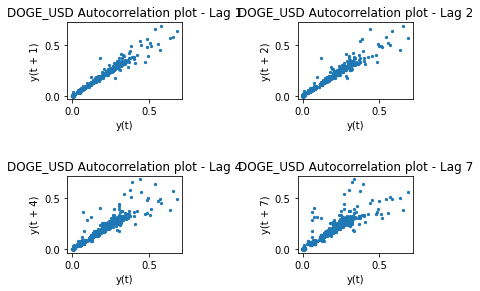

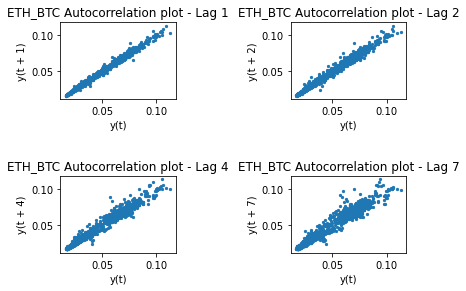

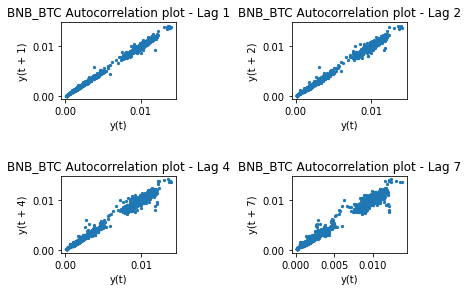

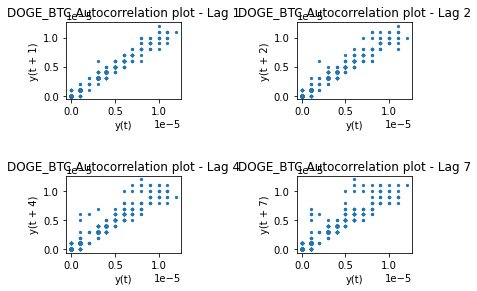

In [13]:
for i in range(7):
    n=1
    for j in [1,2,4,7]:
        plt.subplot(2,2,n)
        n=n+1
        lag_plot(df_list[i].Close, lag=j,s = 5)
        plt.title(get_df_name(df_list[i])[:-3] + " Autocorrelation plot - Lag " + str(j))
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
    plt.show()

These all look approximately linear, which is what we would expect to be able to predict future prices. Dogecoin might not be very accurate if we attempt to predict it, but I am interested to see how a similar model will perform on a coin that is much more volatile compared to a more stable coin.

To use the ARIMA model we will need to do some additional checks and changes to the data, but we will do this at the same time as training and applying the model.

Before doing that, I would like to look at the lag plots for the data only starting in the year 2021. This is because before that, cryptocurrencies had not quite gotten popular enough to be worth anything, and almost all of the coins were close to zero USD. When implementing with more coins, it might be necessary to have a function to find where to start the data for training the models, but for now we will look at early 2021 onwards. In addition, it will be much easier to work with within one data frame, so we will do that now.

In [18]:
print(df_list[0][df_list[0].index >= pd.to_datetime("2021")])

                  Date          Open          High           Low  \
Date                                                               
2021-01-01  2021-01-01  28994.009766  29600.626953  28803.585938   
2021-01-02  2021-01-02  29376.455078  33155.117188  29091.181641   
2021-01-03  2021-01-03  32129.408203  34608.558594  32052.316406   
2021-01-04  2021-01-04  32810.949219  33440.218750  28722.755859   
2021-01-05  2021-01-05  31977.041016  34437.589844  30221.187500   
...                ...           ...           ...           ...   
2022-08-08  2022-08-08  23179.527344  24203.689453  23176.546875   
2022-08-09  2022-08-09  23811.484375  23898.615234  22982.000000   
2022-08-10  2022-08-10  23162.898438  24127.414063  22771.519531   
2022-08-11  2022-08-11  23948.345703  24822.628906  23900.996094   
2022-08-12  2022-08-12  23966.562500  24039.736328  23828.593750   

                   Close     Adj Close       Volume  
Date                                                 
2021-01

In [22]:
df = pd.DataFrame()
for data in df_list:
    df[get_df_name(data)[:-3]] = data["Close"][data.index >= pd.to_datetime("2021")]
    
df.index = df_list[0].index[df_list[0].index >= pd.to_datetime("2021")]

In [23]:
df.head(5)

,BTC_USD,ETH_USD,BNB_USD,DOGE_USD,ETH_BTC,BNB_BTC,DOGE_BTC
Date,,,,,,,
2021-01-01,29374.152344,730.367554,37.905010,0.005685,0.024864,0.001290,0.0
2021-01-02,32127.267578,774.534973,38.241592,0.010615,0.024108,0.001190,0.0
2021-01-03,32782.023438,975.507690,41.148979,0.009771,0.029757,0.001255,0.0
2021-01-04,31971.914063,1040.233032,40.926353,0.009767,0.032536,0.001280,0.0
2021-01-05,33992.429688,1100.006104,41.734600,0.009920,0.032360,0.001228,0.0


In [24]:
print(df.isna().sum())

BTC_USD     0
ETH_USD     0
BNB_USD     0
DOGE_USD    0
ETH_BTC     1
BNB_BTC     1
DOGE_BTC    1
dtype: int64


In [27]:
df.fillna(method="ffill",inplace=True)

In [28]:
print(df.isna().sum())

BTC_USD     0
ETH_USD     0
BNB_USD     0
DOGE_USD    0
ETH_BTC     0
BNB_BTC     0
DOGE_BTC    0
dtype: int64


This time, I want to make sure that we actually have values for each of the dates, so that each coin has the same index for the close prices, so I am using forward fill. With this type of data set, I believe it would make sense to fill with the 7 or 14 day average not containing that point, or even with the average of the value before and after the null value. Later on I will write a function that will handle that when taking in new data.

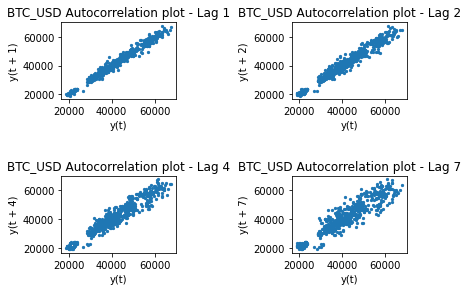

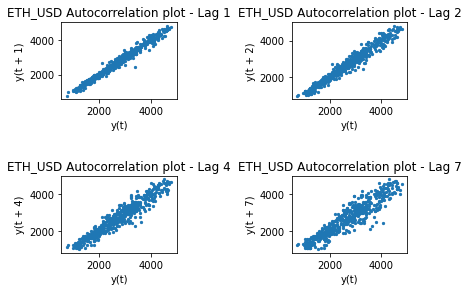

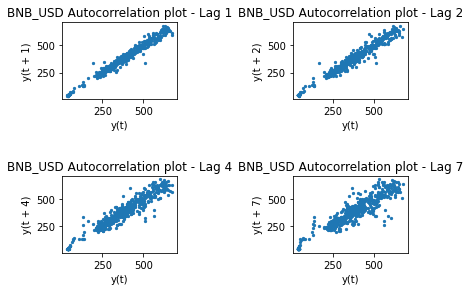

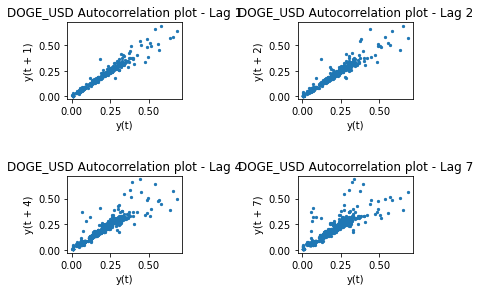

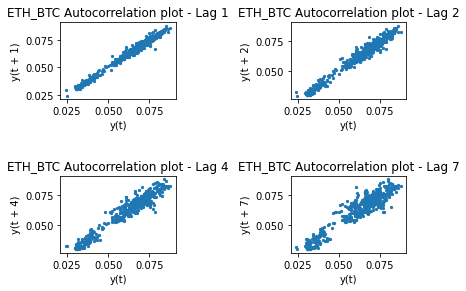

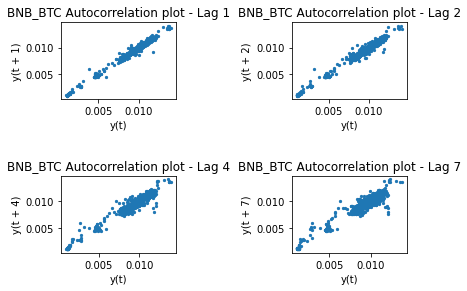

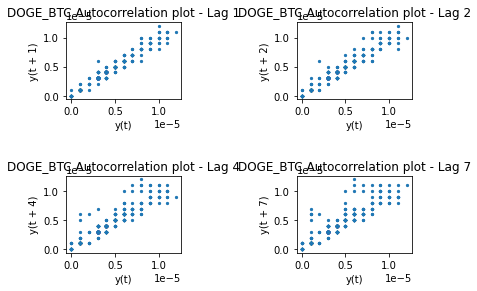

In [29]:
for column in df.columns:
    n=1
    for j in [1,2,4,7]:
        plt.subplot(2,2,n)
        n=n+1
        lag_plot(df[column], lag=j,s = 5)
        plt.title(column + " Autocorrelation plot - Lag " + str(j))
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
    plt.show()

This was expected, but it is still good to check to make sure that even without the first 4-7 years of data, there is still a solid enough correlation between past and current values. This is an approximately linear correlation, which is what we need to be able to do time series analysis.